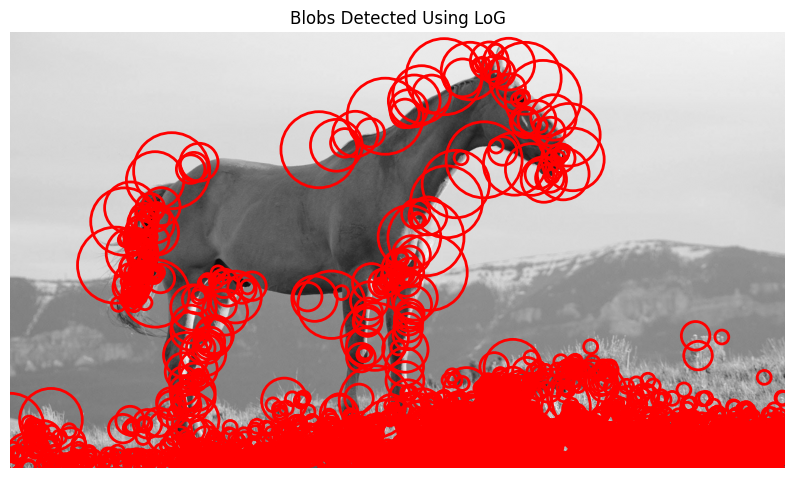

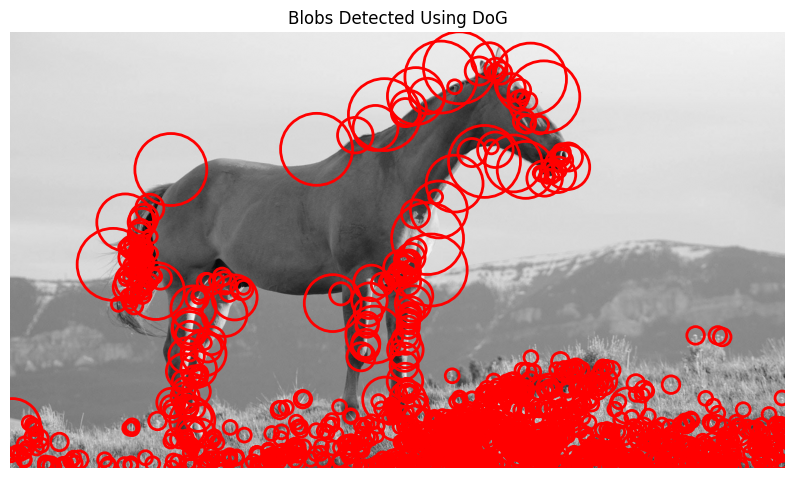

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log, blob_dog

# Load image
image = cv2.imread('horse.jpg', cv2.IMREAD_GRAYSCALE)

# Laplacian of Gaussian (LoG) Blob Detection
blobs_log = blob_log(image, max_sigma=30, num_sigma=10, threshold=0.1)

# Difference of Gaussian (DoG) Blob Detection
blobs_dog = blob_dog(image, max_sigma=30, threshold=0.1)

# Visualize the blobs
def plot_blobs(image, blobs, title):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        plt.scatter(x, y, s=r * 100, edgecolor='red', facecolors='none', linewidth=2)
    plt.title(title)
    plt.axis('off')
    plt.show()

plot_blobs(image, blobs_log, "Blobs Detected Using LoG")
plot_blobs(image, blobs_dog, "Blobs Detected Using DoG")


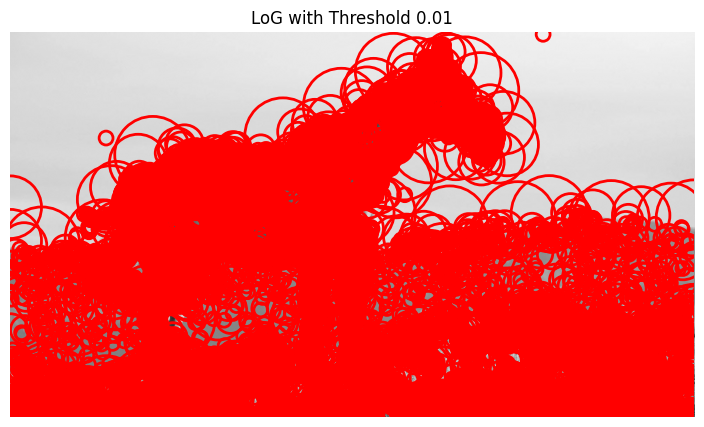

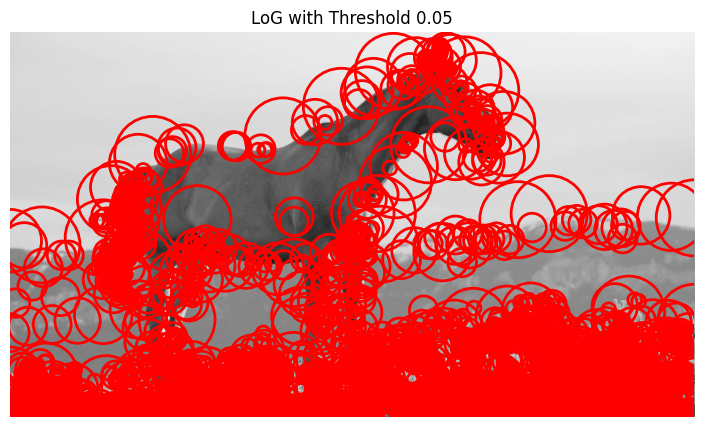

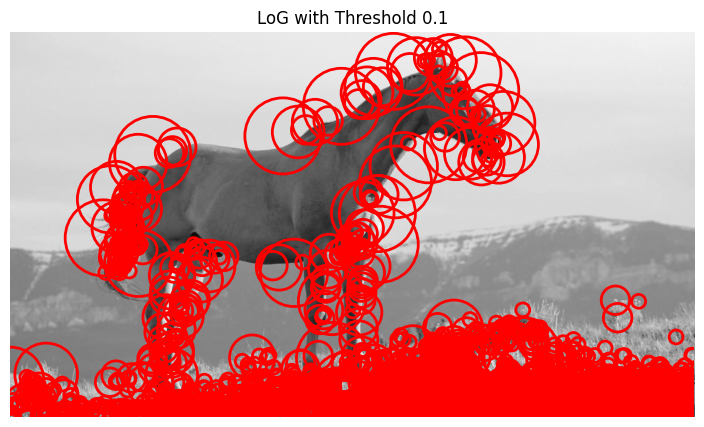

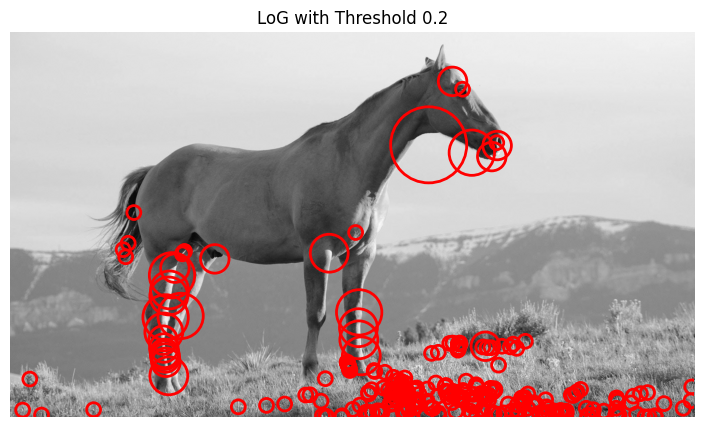

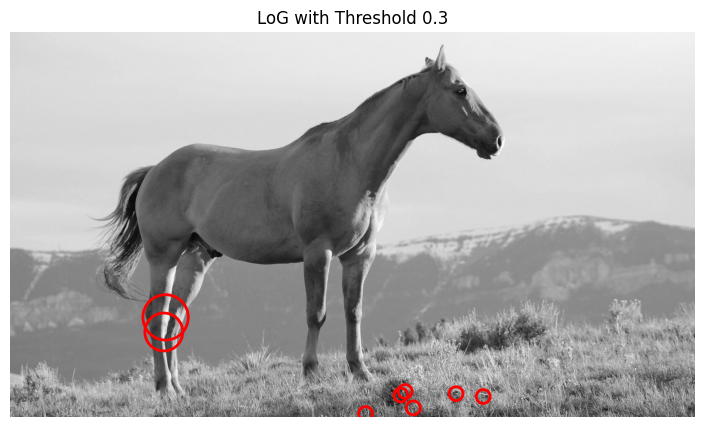

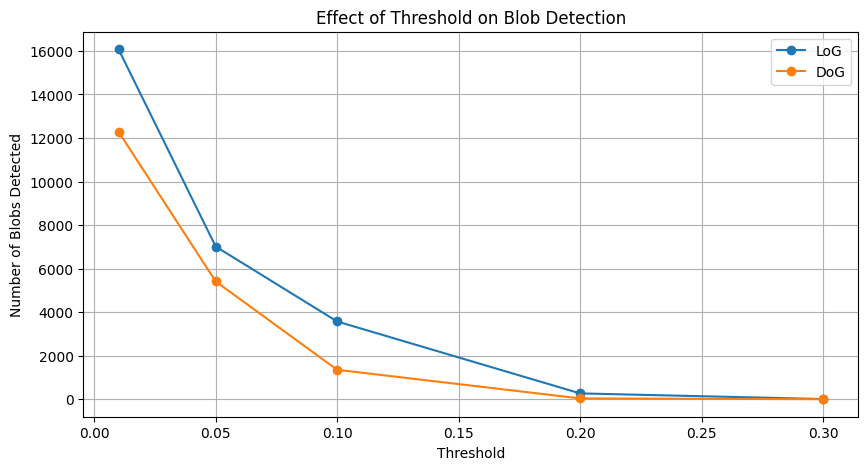

In [ ]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3]  # Different thresholds
results_log = []
results_dog = []

for threshold in thresholds:
    blobs_log = blob_log(image, max_sigma=30, num_sigma=10, threshold=threshold)
    blobs_dog = blob_dog(image, max_sigma=30, threshold=threshold)
    results_log.append(len(blobs_log))
    results_dog.append(len(blobs_dog))
    # Visualize results for each threshold
    plt.figure(figsize=(10, 5))
    plt.imshow(image, cmap='gray')
    for blob in blobs_log:
        y, x, r = blob
        plt.scatter(x, y, s=r * 100, edgecolor='red', facecolors='none', linewidth=2)
    plt.title(f"LoG with Threshold {threshold}")
    plt.axis('off')
    plt.show()

# Plot the number of blobs detected as a function of threshold
plt.figure(figsize=(10, 5))
plt.plot(thresholds, results_log, label="LoG", marker='o')
plt.plot(thresholds, results_dog, label="DoG", marker='o')
plt.title("Effect of Threshold on Blob Detection")
plt.xlabel("Threshold")
plt.ylabel("Number of Blobs Detected")
plt.legend()
plt.grid()
plt.show()


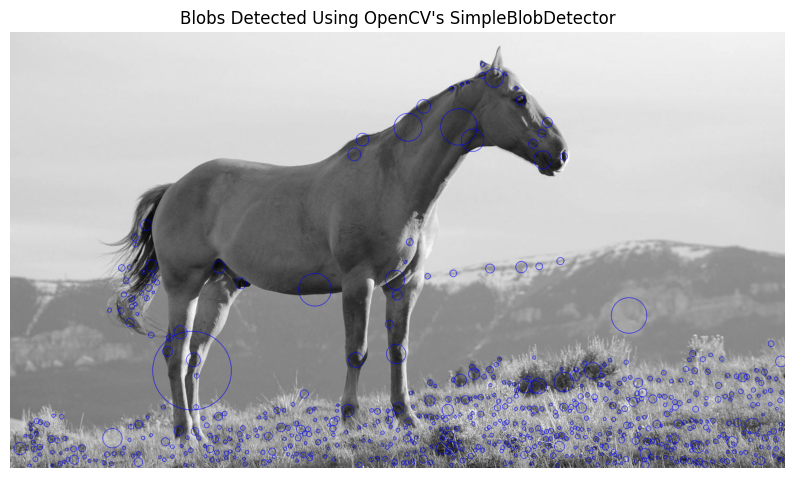

In [ ]:
# Set up SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Thresholds for detection
params.minThreshold = 10  # Minimum grayscale value
params.maxThreshold = 200  # Maximum grayscale value

# Filter by Area
params.filterByArea = True
params.minArea = 30  # Minimum area of blob
params.maxArea = 5000  # Maximum area of blob

# Filter by Circularity
params.filterByCircularity = False  # Enable if circularity is important
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False  # Enable if convexity is important
params.minConvexity = 0.5

# Filter by Inertia
params.filterByInertia = False  # Enable if elongated blobs are important
params.minInertiaRatio = 0.1

# Create a SimpleBlobDetector object
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image
keypoints = detector.detect(image)

# Draw detected blobs as red circles
image_with_keypoints = cv2.drawKeypoints(
    image, keypoints, np.array([]), (0, 0, 255),
    cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Show the result
plt.figure(figsize=(10, 10))
plt.imshow(image_with_keypoints, cmap='gray')
plt.title("Blobs Detected Using OpenCV's SimpleBlobDetector")
plt.axis('off')
plt.show()

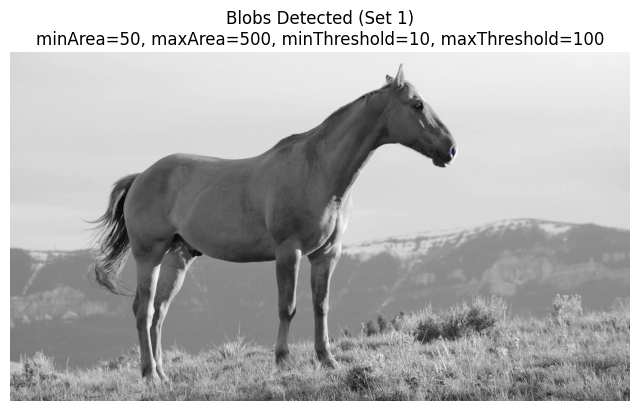

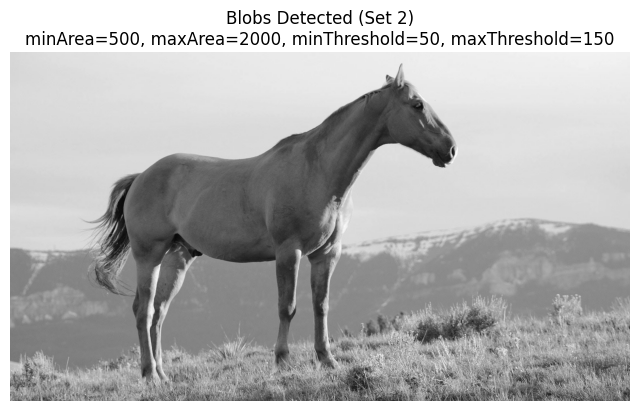

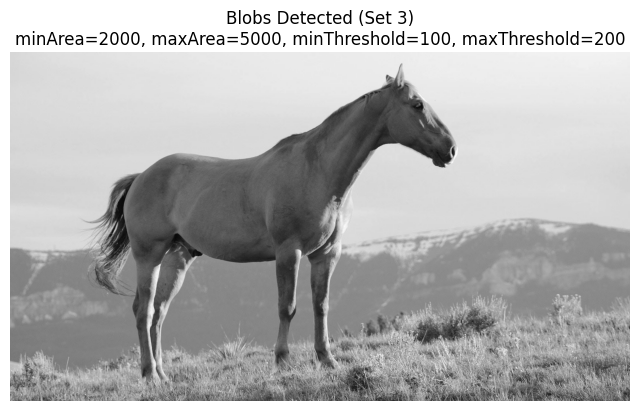

In [ ]:
# Load the grayscale image
img = cv2.imread('horse.jpg', cv2.IMREAD_GRAYSCALE)

# Define parameter sets to experiment with different blob sizes and thresholds
parameter_sets = [
    {"minArea": 50, "maxArea": 500, "minThreshold": 10, "maxThreshold": 100},
    {"minArea": 500, "maxArea": 2000, "minThreshold": 50, "maxThreshold": 150},
    {"minArea": 2000, "maxArea": 5000, "minThreshold": 100, "maxThreshold": 200},
]

# Loop through each parameter set
for i, params_set in enumerate(parameter_sets):
    # Set up SimpleBlobDetector parameters
    params = cv2.SimpleBlobDetector_Params()

    # Set the thresholds
    params.minThreshold = params_set["minThreshold"]
    params.maxThreshold = params_set["maxThreshold"]

    # Set the area filters
    params.filterByArea = True
    params.minArea = params_set["minArea"]
    params.maxArea = params_set["maxArea"]

    # Filter by Circularity (optional)
    params.filterByCircularity = False

    # Create a SimpleBlobDetector with the current parameters
    detector = cv2.SimpleBlobDetector_create(params)

    # Detect blobs
    keypoints = detector.detect(img)

    # Draw detected blobs as red circles
    image_with_keypoints = cv2.drawKeypoints(
        img, keypoints, np.array([]), (0, 0, 255),
        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )

    # Display the result
    plt.figure(figsize=(8, 8))
    plt.imshow(image_with_keypoints, cmap='gray')
    plt.title(f"Blobs Detected (Set {i+1})\n"
              f"minArea={params_set['minArea']}, maxArea={params_set['maxArea']}, "
              f"minThreshold={params_set['minThreshold']}, maxThreshold={params_set['maxThreshold']}")
    plt.axis('off')
    plt.show()


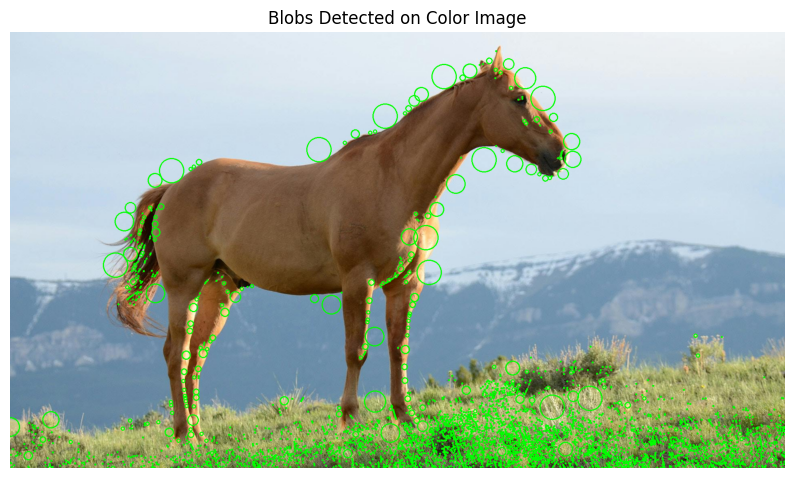

In [ ]:
# Load a color image
color_image = cv2.imread('horse.jpg')
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

# Detect blobs using blob_log
blobs_log = blob_log(gray_image, max_sigma=30, num_sigma=10, threshold=0.1)

# Draw blobs on the color image
for blob in blobs_log:
    y, x, r = blob
    cv2.circle(color_image, (int(x), int(y)), int(r), (0, 255, 0), 2)

# Visualize results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title("Blobs Detected on Color Image")
plt.axis('off')
plt.show()


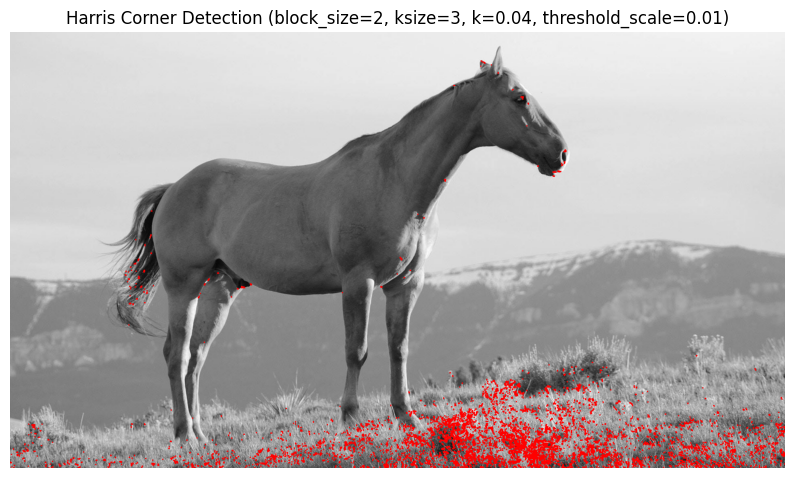

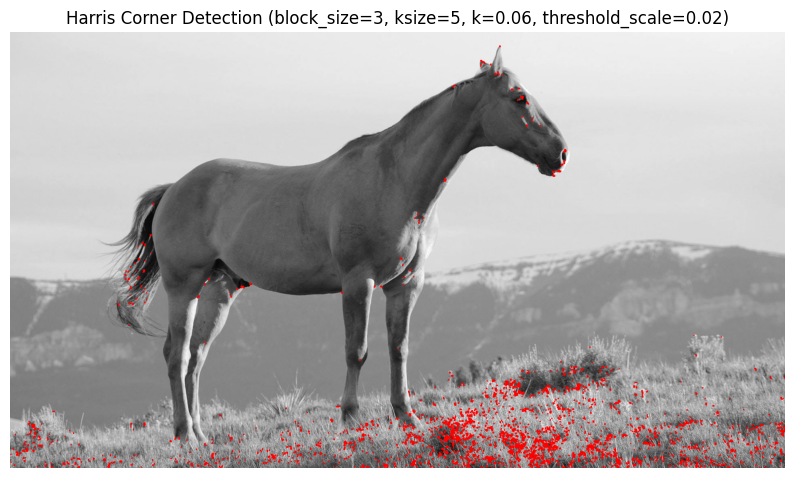

In [ ]:
def harris_corner_experiment(image_path, block_size=2, ksize=3, k=0.04, threshold_scale=0.01):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load the image.")
        return

    # Convert to a color image for visualization
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Apply Harris corner detection
    harris_corners = cv2.cornerHarris(image, blockSize=block_size, ksize=ksize, k=k)

    # Dilate the result to mark the corners
    harris_corners = cv2.dilate(harris_corners, None)

    # Threshold for detecting strong corners
    threshold = threshold_scale * harris_corners.max()
    image_color[harris_corners > threshold] = [0, 0, 255]  # Mark corners in red

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.title(f"Harris Corner Detection (block_size={block_size}, ksize={ksize}, k={k}, threshold_scale={threshold_scale})")
    plt.axis('off')
    plt.show()

# Experiment with different parameters
image_path = 'horse.jpg'  # Replace with your image path
harris_corner_experiment(image_path, block_size=2, ksize=3, k=0.04, threshold_scale=0.01)
harris_corner_experiment(image_path, block_size=3, ksize=5, k=0.06, threshold_scale=0.02)


<ipython-input-12-751068f7997a>:18: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


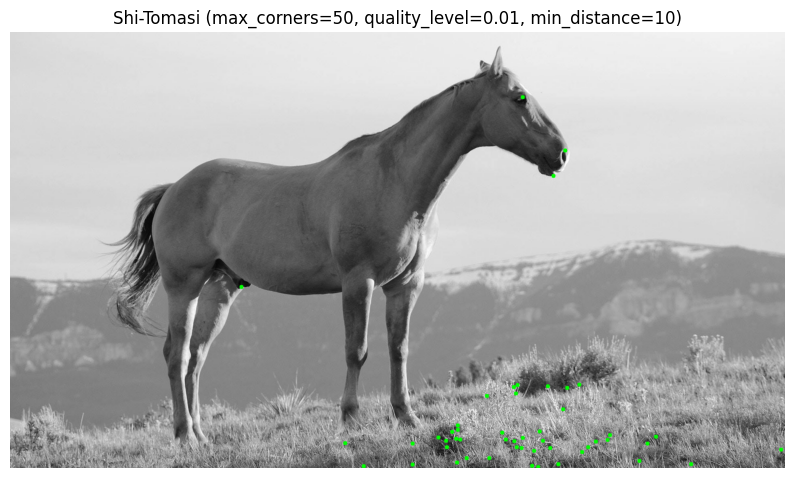

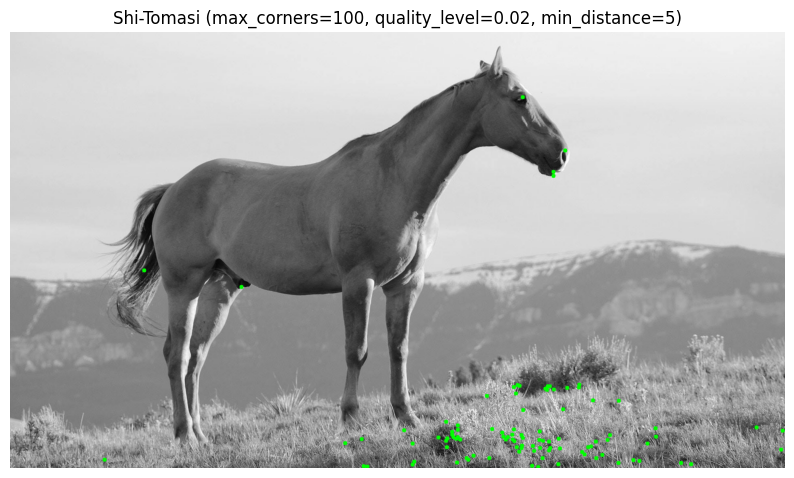

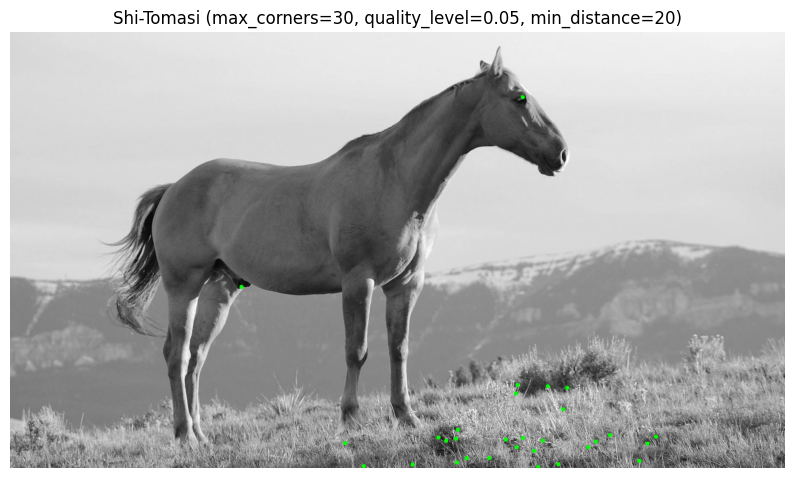

In [ ]:
def shi_tomasi_experiment(image_path, max_corners=50, quality_level=0.01, min_distance=10):
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print("Error: Unable to load the image.")
        return

    # Convert to a color image for visualization
    image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Apply Shi-Tomasi corner detection
    corners = cv2.goodFeaturesToTrack(image, maxCorners=max_corners,
                                      qualityLevel=quality_level,
                                      minDistance=min_distance)

    # Convert corner coordinates to integer values
    if corners is not None:
        corners = np.int0(corners)
        for corner in corners:
            x, y = corner.ravel()
            cv2.circle(image_color, (x, y), 5, (0, 255, 0), -1)  # Green circles for Shi-Tomasi

    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))
    plt.title(f"Shi-Tomasi (max_corners={max_corners}, quality_level={quality_level}, min_distance={min_distance})")
    plt.axis('off')
    plt.show()

# Experiment with different parameters
shi_tomasi_experiment(image_path, max_corners=50, quality_level=0.01, min_distance=10)
shi_tomasi_experiment(image_path, max_corners=100, quality_level=0.02, min_distance=5)
shi_tomasi_experiment(image_path, max_corners=30, quality_level=0.05, min_distance=20)
